# Lakh MIDI Dataset Exploration

This notebook provides an interactive exploration of the Lakh MIDI Dataset using our custom explorer.

## Dataset Overview
- **Total files**: 176,581 unique MIDI files
- **Matched files**: 45,129 files matched to Million Song Dataset
- **Purpose**: Large-scale music information retrieval
- **Source**: [Colin Raffel's Lakh MIDI Dataset](https://colinraffel.com/projects/lmd/)

In [ ]:
# Import necessary libraries
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML, Audio
import warnings
warnings.filterwarnings('ignore')

# Import our custom explorer
from lmd_explorer import LakhMIDIExplorer

# Set up plotting
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
%matplotlib inline

## 1. Initialize the Explorer

In [2]:
# Initialize the explorer
explorer = LakhMIDIExplorer(dataset_path="./lmd_data", cache_dir="./cache")

print("🎵 Lakh MIDI Dataset Explorer initialized!")
print(f"📁 Dataset path: {explorer.dataset_path}")
print(f"💾 Cache path: {explorer.cache_dir}")

🎵 Lakh MIDI Dataset Explorer initialized!
📁 Dataset path: lmd_data
💾 Cache path: cache


## 2. Download and Load Metadata

In [3]:
# Download metadata files (these are small and quick)
explorer.download_dataset(['md5_to_paths', 'match_scores'])

# Load the metadata
explorer.load_metadata()

print(f"📂 MD5 mappings loaded: {len(explorer.md5_to_paths):,}")
print(f"🎯 Match scores loaded: {len(explorer.match_scores):,}")

🎵 Downloading Lakh MIDI Dataset components...
✅ md5_to_paths already exists: lmd_data/md5_to_paths.json
✅ match_scores already exists: lmd_data/match_scores.json
📂 Loading metadata...
✅ Loaded 178561 MD5 to path mappings
✅ Loaded 31034 match scores
📂 MD5 mappings loaded: 178,561
🎯 Match scores loaded: 31,034


## 3. Explore Metadata

Let's look at some sample metadata to understand the dataset structure.

In [4]:
# Sample MD5 to path mappings
print("Sample MD5 to Path Mappings:")
sample_md5 = list(explorer.md5_to_paths.items())[:5]
for md5, path in sample_md5:
    print(f"  {md5}: {path}")

Sample MD5 to Path Mappings:
  1c83fc02b8c57fbc2605900bb31793fb: ['E/Exaltasamba - Megastar.mid', 'Midis Samba e Pagode/Exaltasamba - Megastar.mid', 'Midis Samba e Pagode/Exaltasamba - Megastar.mid']
  fbcfdb9398bada87210d970ff3563a1e: ['MIDIS POP E ROCK/Lobao - A Queda.mid', 'Midis Pop e Rock/Lobao - A Queda.mid', 'Midis Pop e Rock/Lobao - A Queda.mid']
  6d6a6ecbdc8a9141e17346dbe4c0349e: ['TV_Themes_www.tv-timewarp.co.uk_MIDIRip/Rainbow.mid']
  7717b0e2e566e90e3e01497401863e82: ['Beatles/Happiness is a Warm Gun.mid', 'Beatles, The/Happiness-Is-A-Warm-Gun.mid', 'Beatles, The/Happiness-Is-A-Warm-Gun.mid', 'Beatles +GeorgeJohnPaulRingo/HappinessIsAWarmGun.mid', 'Beatles +GeorgeJohnPaulRingo/HappinessIsAWarmGun.mid', 'beatles/warmgun.mid', 'Various Artists/warmgun.mid', 'Beatles/happiness_is_a_warm_gun.mid', 'beatles/warmgun.mid', 'Various Artists/warmgun.mid', 'beatles/Happiness_Is_A_Warm_Gun.mid', 'H/Happiness-Is-A-Warm-Gun.mid', 'Beatles, The/Happiness-Is-A-Warm-Gun.mid', 'beatles/war

In [5]:
# Sample match scores
print("Sample Match Scores:")
sample_scores = list(explorer.match_scores.items())[:5]
for song_id, score in sample_scores:
    print(f"  {song_id}: {score}")

Sample Match Scores:
  TRRNARX128F4264AEB: {'cd3b9c8bb118575bcd712cffdba85fce': 0.7040202098544246}
  TRWMHMP128EF34293F: {'c3da6699f64da3db8e523cbbaa80f384': 0.7321245522741104, 'd8392424ea57a0fe6f65447680924d37': 0.7476196649194942}
  TRWOLRE128F427D710: {'728c3dbdc9b47142dc8f725c6805c259': 0.6720550712904779, '468be2f5dd31a1ba444b8018d8e8c7ad': 0.7359987644809902, '1882595a3905adc9f5258a0c7f12e84d': 0.668445525775334, '6610c6e885ae4524ec6c3db50cc3ab53': 0.6316134362439223, '03b77bd9334f18bddff53535fe6ca953': 0.6395130395002708, '64b53e1dc28ac96bc4a860ada0021bb0': 0.7226302373042208, '544aff782dcc97dfd317a47cc7b7899b': 0.6716007881421701, 'ae4502a8dc4853d7efc9edb0c12f6682': 0.6614824548436951, '6c88022b86c00f7bd5d4d3e84ec1a075': 0.7359987644809902}
  TRDZKYG128F92E3640: {'5b816e7e41f0d09c59497a39b152473b': 0.7312736087608965, '5aee6ba5da2ea657782346acbfbdb76a': 0.7312736087608965, '39d33832518d3d97560e0d54549c44b9': 0.7312736087608965, '0d0282c5946c2e242a37b37578d3c2e0': 0.7312736087

## 4. Download Sample Data

For this demo, we'll download the matched subset (smaller than the full dataset).

In [ ]:
# Uncomment the next line to download the matched MIDI files
# Note: This is about 1.5GB and may take some time

#explorer.download_dataset(['lmd_matched'])

print("💡 To download the matched dataset, uncomment the line above.")
print("📁 For now, we'll work with any existing files or create sample analysis.")

🎵 Downloading Lakh MIDI Dataset components...
📥 Downloading lmd_matched...


lmd_matched.tar.gz: 100%|██████████| 1.31G/1.31G [02:05<00:00, 11.2MB/s]


✅ Downloaded: lmd_data/lmd_matched.tar.gz
📦 Extracting lmd_data/lmd_matched.tar.gz...
✅ Extracted to: lmd_data
💡 To download the matched dataset, uncomment the line above.
📁 For now, we'll work with any existing files or create sample analysis.


## 5. Analyze MIDI Files

Let's analyze a sample of MIDI files to understand their characteristics.

In [14]:
# Analyze a sample of files (adjust max_files as needed)
results = explorer.batch_analyze(subset='matched', max_files=10000)

if results and results['summary']['valid_files'] > 0:
    print(f"✅ Successfully analyzed {results['summary']['valid_files']} files")
    print(f"❌ {results['summary']['invalid_files']} files had errors")
else:
    print("ℹ️  No MIDI files found for analysis.")
    print("   Either download the dataset or place some MIDI files in the data directory.")

🔍 Scanning MIDI files (matched)...
📁 Found 10000 MIDI files
🎼 Analyzing 10000 MIDI files...


Analyzing MIDI files: 100%|██████████| 10000/10000 [23:17<00:00,  7.16it/s] 


💾 Saved analysis cache to cache/analysis_matched_10000.pkl
✅ Analysis complete: 9907/10000 files valid
✅ Successfully analyzed 9907 files
❌ 93 files had errors


## 6. Generate Statistics

In [15]:
# Generate comprehensive statistics
if explorer.analysis_results and explorer.analysis_results['summary']['valid_files'] > 0:
    stats = explorer.generate_statistics()
    
    # Display the summary report
    explorer.print_summary_report()
else:
    print("ℹ️  No analysis results available. Run the analysis cell above first.")


🎵 LAKH MIDI DATASET EXPLORATION REPORT

📊 DATASET OVERVIEW
   Total files analyzed: 10,000
   Valid MIDI files: 9,907
   Invalid files: 93
   Success rate: 99.1%

⏱️  DURATION STATISTICS
   Mean duration: 224.7 seconds (3.7 minutes)
   Median duration: 225.6 seconds
   Shortest file: 30.0 seconds
   Longest file: 3600.0 seconds (60.0 minutes)

🎼 INSTRUMENT STATISTICS
   Mean instruments per file: 10.1
   Median instruments per file: 10.0
   Max instruments in a file: 55

🎵 NOTE STATISTICS
   Total notes in dataset: 46,774,382
   Mean notes per file: 4721
   Median notes per file: 4334

🎸 TOP 10 INSTRUMENTS
    1. Acoustic Grand Piano: 7,135 occurrences
    2. String Ensemble 1: 4,823 occurrences
    3. Acoustic Guitar (steel): 3,794 occurrences
    4. Electric Bass (finger): 3,168 occurrences
    5. Electric Guitar (clean): 2,685 occurrences
    6. String Ensemble 2: 2,607 occurrences
    7. Fretless Bass: 2,602 occurrences
    8. Choir Aahs: 2,589 occurrences
    9. Overdriven Guitar

## 7. Create Visualizations

📊 Visualizations saved to ./cache/notebook_analysis_plots.png


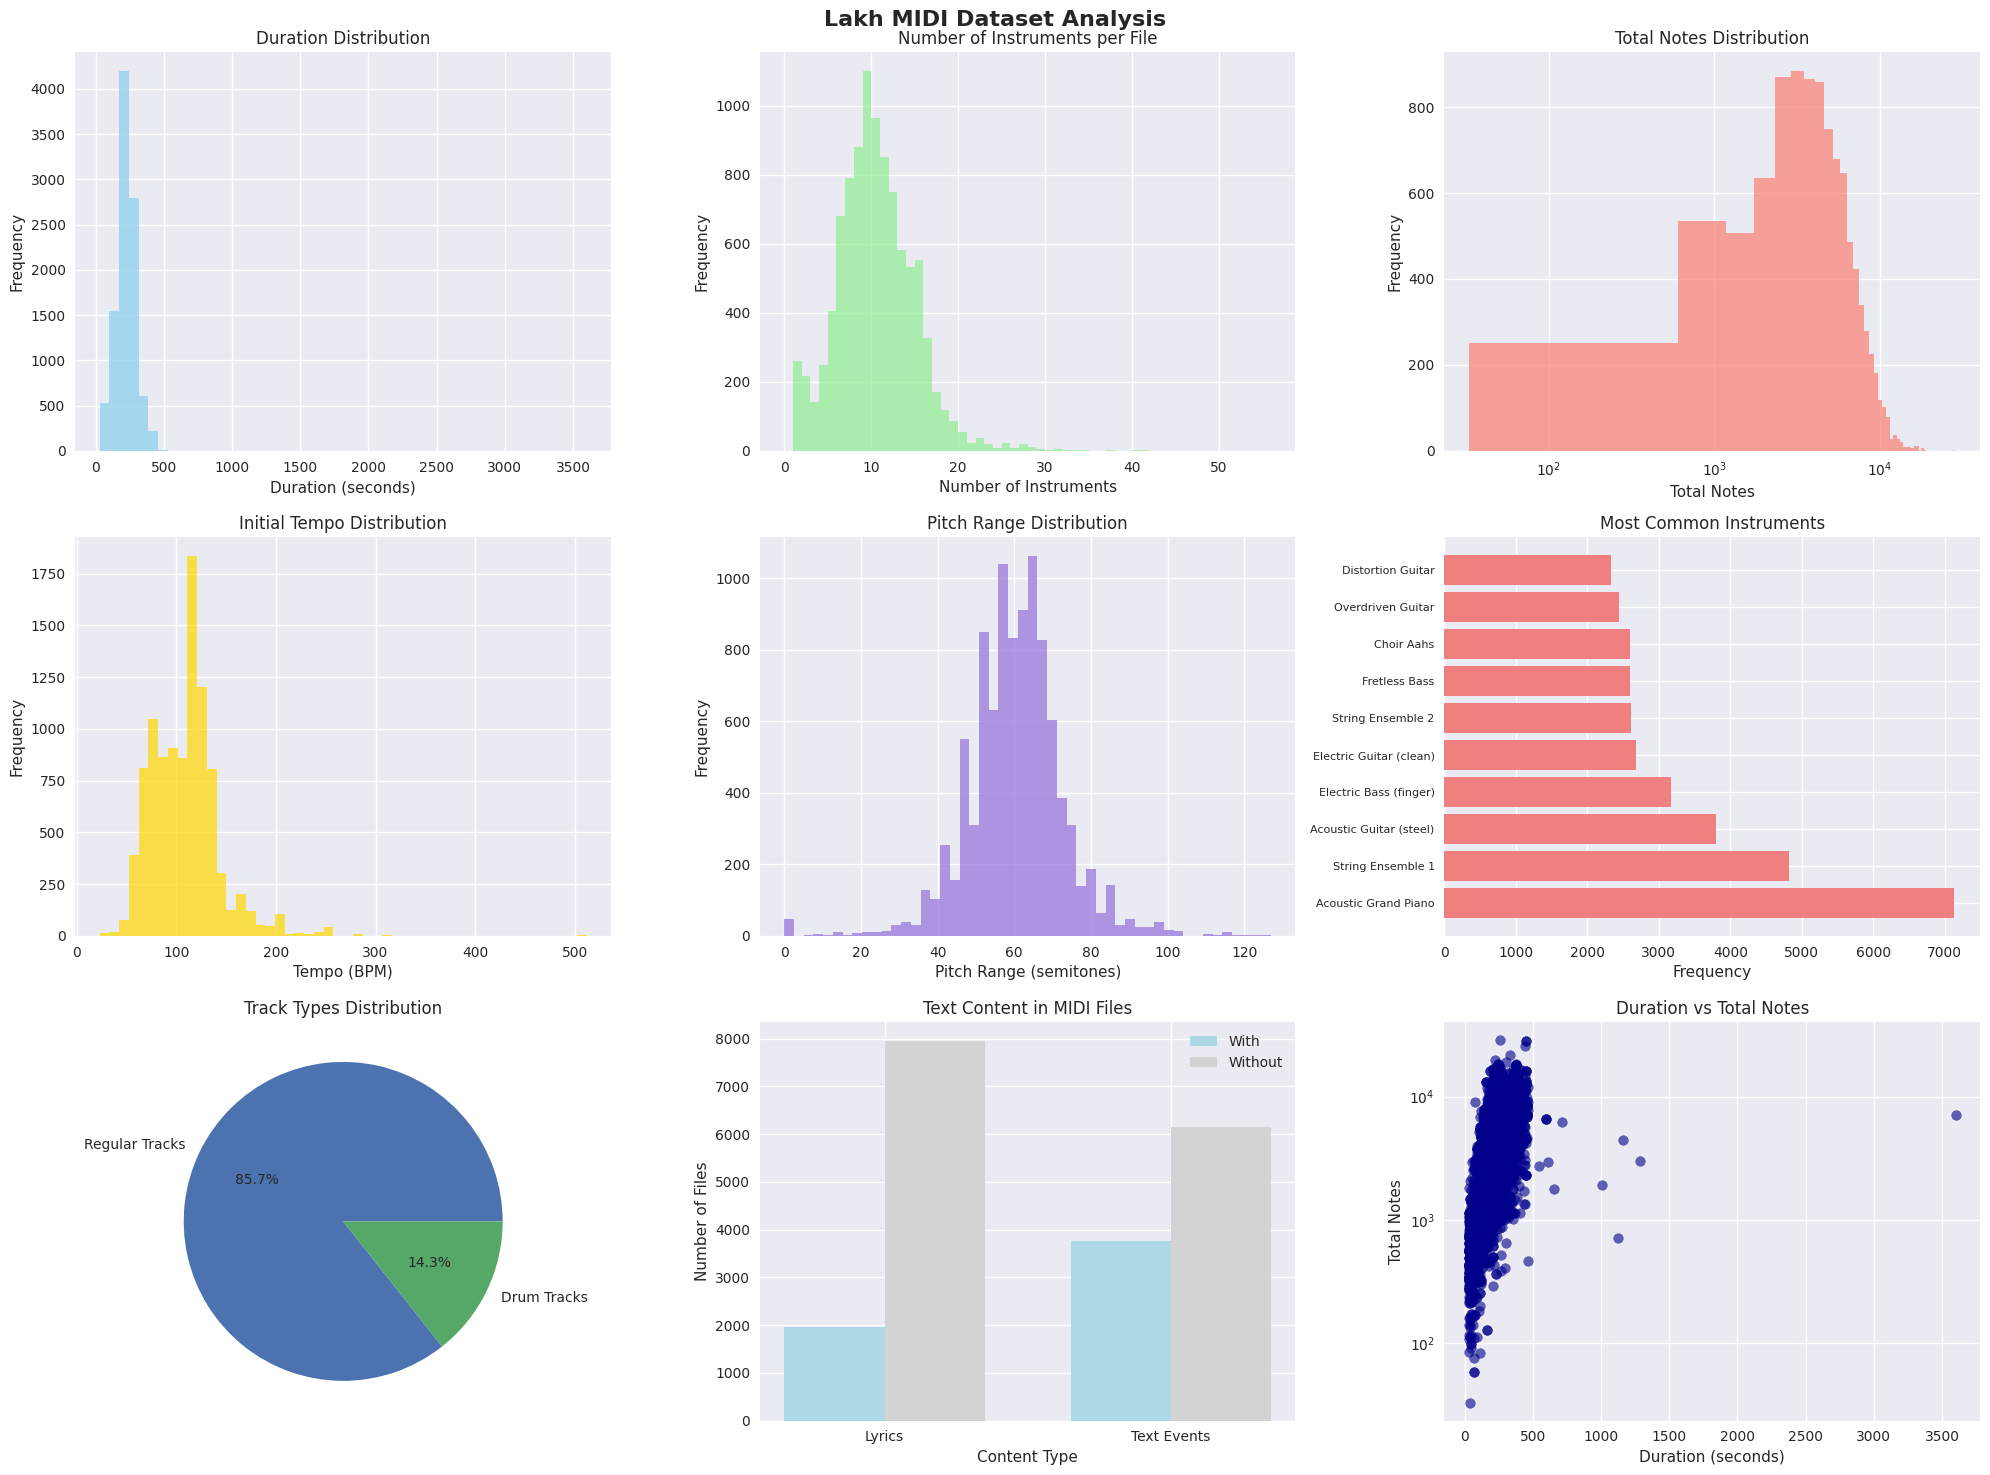

In [16]:
# Create comprehensive visualizations
if explorer.analysis_results and explorer.midi_stats:
    explorer.create_visualizations(save_path="./cache/notebook_analysis_plots.png")
else:
    print("ℹ️  No analysis results available for visualization.")

## 8. Detailed Analysis

Let's dive deeper into specific aspects of the dataset.

In [18]:
# Create a DataFrame for easier analysis
if explorer.analysis_results:
    valid_files = [f for f in explorer.analysis_results['files'] if f.get('valid', False)]
    
    if valid_files:
        df = pd.DataFrame(valid_files)
        
        print(f"📊 Dataset shape: {df.shape}")
        print("\n📋 Column names:")
        for col in df.columns:
            print(f"  • {col}")
        
        # Show basic statistics
        print("\n📈 Basic Statistics:")
        numeric_cols = ['duration', 'num_instruments', 'total_notes']
        display(df[numeric_cols].describe())
    else:
        print("ℹ️  No valid files to analyze.")
else:
    print("ℹ️  No analysis results available.")

📊 Dataset shape: (9907, 16)

📋 Column names:
  • filename
  • duration
  • num_instruments
  • num_tracks
  • num_drum_tracks
  • tempo_changes
  • key_signatures
  • time_signatures
  • total_notes
  • programs
  • instruments
  • has_lyrics
  • has_text
  • pitch_range
  • tempo_stats
  • valid

📈 Basic Statistics:


,duration,num_instruments,total_notes
count,9907.000000,9907.000000,9907.000000
mean,224.698234,10.084587,4721.346725
std,82.674992,4.579613,2820.418875
min,30.004883,1.000000,33.000000
25%,181.930693,7.000000,2689.000000
50%,225.572388,10.000000,4334.000000
75%,262.136715,13.000000,6256.000000
max,3600.002516,55.000000,28634.000000


## 9. Custom Analysis Examples

Here are some examples of custom analysis you can perform.

🎼 Files with the most instruments:


,filename,num_instruments,duration
8763,ceb28b325dcd095ebb0f3a5f68891a57.mid,55,240.454247
1685,a7a57189b461b9ed673d7689373fdd4a.mid,48,318.818171
1227,f5329369aec5613043411149cf3fe380.mid,46,110.730658
1532,5a30d7148077415455c97e279fa83d4c.mid,43,251.075927
1406,aec33100abd923d335337d8d629107e0.mid,41,58.823333



🔗 Correlation between features:


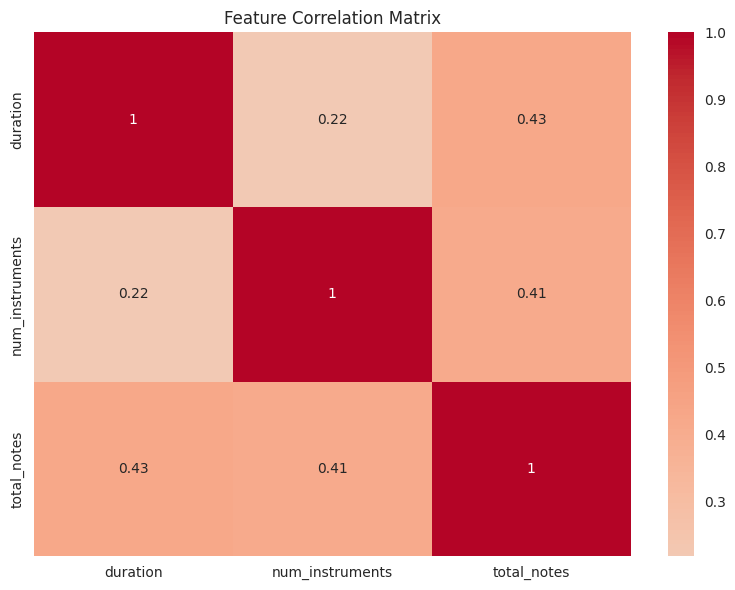

In [19]:
# Example 1: Find files with the most instruments
if 'df' in locals() and not df.empty:
    print("🎼 Files with the most instruments:")
    top_instruments = df.nlargest(5, 'num_instruments')[['filename', 'num_instruments', 'duration']]
    display(top_instruments)
    
    # Example 2: Correlation analysis
    print("\n🔗 Correlation between features:")
    corr_cols = ['duration', 'num_instruments', 'total_notes']
    correlation_matrix = df[corr_cols].corr()
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
    plt.title('Feature Correlation Matrix')
    plt.tight_layout()
    plt.show()
else:
    print("ℹ️  No data available for custom analysis.")

## 10. Export Results

In [20]:
# Export analysis results
if explorer.analysis_results:
    output_file = explorer.export_results("notebook_analysis_results.json")
    print(f"📤 Results exported to: {output_file}")
else:
    print("ℹ️  No results to export.")

📤 Results exported to cache/notebook_analysis_results.json
📤 Results exported to: cache/notebook_analysis_results.json


## 11. Next Steps and Ideas

Here are some ideas for further exploration:

### Machine Learning Applications
- **Genre Classification**: Use extracted features to classify MIDI files by genre
- **Style Transfer**: Learn to convert between different musical styles
- **Music Generation**: Train models to generate new MIDI sequences
- **Similarity Search**: Find similar songs based on musical features

### Musical Analysis
- **Chord Progression Analysis**: Extract and analyze common chord progressions
- **Rhythm Pattern Analysis**: Study rhythmic patterns across different genres
- **Instrument Usage Trends**: Analyze how instrument usage varies across time periods
- **Key and Mode Analysis**: Study the distribution of keys and modes

### Data Science Projects
- **Clustering**: Group similar songs together
- **Anomaly Detection**: Find unusual or unique songs in the dataset
- **Time Series Analysis**: Study how musical trends change over time
- **Network Analysis**: Create networks of similar songs or artists

In [13]:
print("🎵 Lakh MIDI Dataset Exploration Complete!")
print("\n💡 To continue exploring:")
print("   1. Download more dataset components")
print("   2. Increase the max_files parameter for larger analysis")
print("   3. Implement custom analysis functions")
print("   4. Use the extracted features for machine learning projects")
print("\n📚 Resources:")
print("   • Dataset homepage: https://colinraffel.com/projects/lmd/")
print("   • Pretty MIDI documentation: https://craffel.github.io/pretty-midi/")
print("   • Music Information Retrieval: https://musicinformationretrieval.com/")

🎵 Lakh MIDI Dataset Exploration Complete!

💡 To continue exploring:
   1. Download more dataset components
   2. Increase the max_files parameter for larger analysis
   3. Implement custom analysis functions
   4. Use the extracted features for machine learning projects

📚 Resources:
   • Dataset homepage: https://colinraffel.com/projects/lmd/
   • Pretty MIDI documentation: https://craffel.github.io/pretty-midi/
   • Music Information Retrieval: https://musicinformationretrieval.com/


In [22]:
explorer.midi_stats

{'duration': {'mean': np.float64(224.69823387372796),
  'median': np.float64(225.57238750000002),
  'std': np.float64(82.6749923423068),
  'min': np.float64(30.0048828125),
  'max': np.float64(3600.002515520834)},
 'instruments': {'mean_per_file': np.float64(10.08458665589987),
  'median_per_file': np.float64(10.0),
  'max_per_file': np.int64(55)},
 'notes': {'mean_per_file': np.float64(4721.346724538205),
  'median_per_file': np.float64(4334.0),
  'total_notes': np.int64(46774382)},
 'tempo': {'mean_initial': np.float64(108.93836401706665),
  'mean_avg': np.float64(105.64786244180519)},
 'common_instruments': [('Acoustic Grand Piano', 7135),
  ('String Ensemble 1', 4823),
  ('Acoustic Guitar (steel)', 3794),
  ('Electric Bass (finger)', 3168),
  ('Electric Guitar (clean)', 2685),
  ('String Ensemble 2', 2607),
  ('Fretless Bass', 2602),
  ('Choir Aahs', 2589),
  ('Overdriven Guitar', 2448),
  ('Distortion Guitar', 2327)],
 'common_programs': [(np.int32(0), 7135),
  (np.int32(48), 4823

In [24]:
df.instruments

0       [Flute, Flute, Acoustic Grand Piano, Synth Bra...
1       [Blown bottle, Pad 2 (warm), Voice Oohs, Brigh...
2       [Acoustic Grand Piano, Acoustic Grand Piano, A...
3       [Bassoon, Vibraphone, Synth Drum, Electric Gui...
4       [Acoustic Grand Piano, Acoustic Grand Piano, A...
                              ...                        
9902    [Bright Acoustic Piano, Electric Guitar (clean...
9903    [Bright Acoustic Piano, Electric Bass (finger)...
9904    [Electric Bass (finger), Bright Acoustic Piano...
9905    [Electric Bass (finger), Bright Acoustic Piano...
9906    [Bright Acoustic Piano, Electric Bass (finger)...
Name: instruments, Length: 9907, dtype: object

In [32]:
list_intruments = []
for i in df.instruments:
    for f in i:
        if f not in list_intruments:
            list_intruments.append(f)

list_intruments


['Flute',
 'Acoustic Grand Piano',
 'Synth Brass 1',
 'String Ensemble 2',
 'Distortion Guitar',
 'Church Organ',
 'String Ensemble 1',
 'Violin',
 'Electric Bass (finger)',
 'Blown bottle',
 'Pad 2 (warm)',
 'Voice Oohs',
 'Bright Acoustic Piano',
 'Acoustic Bass',
 'Electric Guitar (clean)',
 'Overdriven Guitar',
 'Electric Guitar (muted)',
 'Pad 7 (halo)',
 'Seashore',
 'Bassoon',
 'Vibraphone',
 'Synth Drum',
 'Electric Piano 1',
 'Rock Organ',
 'Synth Strings 1',
 'French Horn',
 'Electric Guitar (jazz)',
 'Tubular Bells',
 'Choir Aahs',
 'Synth Choir',
 'Kalimba',
 'Timpani',
 'Lead 3 (calliope)',
 'Acoustic Guitar (steel)',
 'Acoustic Guitar (nylon)',
 'Fretless Bass',
 'Steel Drums',
 'Trumpet',
 'Brass Section',
 'Alto Sax',
 'Tenor Sax',
 'Baritone Sax',
 'Trombone',
 'Harmonica',
 'Piccolo',
 'Tuba',
 'FX 5 (brightness)',
 'Pizzicato Strings',
 'Marimba',
 'Orchestral Harp',
 'Accordion',
 'Glockenspiel',
 'Guitar Fret Noise',
 'Pan Flute',
 'Celesta',
 'Music Box',
 'Clarin

In [33]:
len(list_intruments)

128

In [37]:
df

,filename,duration,num_instruments,num_tracks,num_drum_tracks,tempo_changes,key_signatures,time_signatures,total_notes,programs,instruments,has_lyrics,has_text,pitch_range,tempo_stats,valid
0,b05ed888cc96ef0a81ae6e05ee807d9f.mid,299.514852,18,17,1,3,1,1,7172,"[73, 73, 0, 62, 0, 62, 49, 30, 19, 48, 0, 0, 0...","[Flute, Flute, Acoustic Grand Piano, Synth Bra...",False,False,"{'min_pitch': 26, 'max_pitch': 93, 'pitch_rang...","{'initial_tempo': 156.00015600015604, 'mean_te...",True
1,988d41b1d934d6875e9d05337d83dfa0.mid,226.646398,14,13,1,1,1,1,5609,"[76, 89, 53, 1, 32, 27, 29, 28, 48, 94, 73, 33...","[Blown bottle, Pad 2 (warm), Voice Oohs, Brigh...",False,False,"{'min_pitch': 26, 'max_pitch': 100, 'pitch_ran...","{'initial_tempo': 122.99996925000768, 'mean_te...",True
2,59407200ea03eabb791e81df9cec4aa7.mid,209.876549,13,12,1,1,0,1,6536,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[Acoustic Grand Piano, Acoustic Grand Piano, A...",False,True,"{'min_pitch': 29, 'max_pitch': 96, 'pitch_rang...","{'initial_tempo': 127.00025400050801, 'mean_te...",True
3,ae9fcc0f28ddadcdffcf324db1d29f1a.mid,215.840473,8,7,1,1,1,1,5067,"[70, 11, 118, 27, 33, 4, 18]","[Bassoon, Vibraphone, Synth Drum, Electric Gui...",False,True,"{'min_pitch': 31, 'max_pitch': 86, 'pitch_rang...","{'initial_tempo': 118.99992463338106, 'mean_te...",True
4,43d700c7790b4730b8cf948de853868f.mid,195.791471,9,8,1,1,1,7,3937,"[0, 0, 0, 0, 0, 0, 0, 0]","[Acoustic Grand Piano, Acoustic Grand Piano, A...",False,True,"{'min_pitch': 28, 'max_pitch': 83, 'pitch_rang...","{'initial_tempo': 126.00012600012599, 'mean_te...",True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9902,3834ce9255e4316dd276cc7bc3338432.mid,210.649404,14,13,1,1,1,2,6106,"[1, 27, 27, 35, 52, 64, 4, 48, 24, 48, 28, 62,...","[Bright Acoustic Piano, Electric Guitar (clean...",True,True,"{'min_pitch': 28, 'max_pitch': 97, 'pitch_rang...","{'initial_tempo': 102.0000510000255, 'mean_tem...",True
9903,6a9213692cd698ca8f3ec9112b0c7383.mid,234.020996,12,11,1,6,0,1,5946,"[1, 33, 52, 52, 53, 90, 0, 48, 73, 89, 49]","[Bright Acoustic Piano, Electric Bass (finger)...",True,False,"{'min_pitch': 28, 'max_pitch': 108, 'pitch_ran...","{'initial_tempo': 103.00270038746181, 'mean_te...",True
9904,c68eae7670b86de7125fb206f7ea3027.mid,236.643375,10,9,1,1,0,2,8311,"[33, 1, 94, 48, 94, 52, 90, 105, 1]","[Electric Bass (finger), Bright Acoustic Piano...",False,True,"{'min_pitch': 28, 'max_pitch': 97, 'pitch_rang...","{'initial_tempo': 100.40160642570281, 'mean_te...",True
9905,405e46a4f0c21397932834ca47c2de73.mid,232.785000,10,9,1,1,1,1,8228,"[33, 1, 94, 48, 94, 52, 90, 105, 1]","[Electric Bass (finger), Bright Acoustic Piano...",False,False,"{'min_pitch': 28, 'max_pitch': 97, 'pitch_rang...","{'initial_tempo': 100.0, 'mean_tempo': 100.0, ...",True
